In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
print(torch.__version__)

1.12.0+cu113


In [34]:
Tensor = torch.tensor([[[1,2,3],
                      [2,3,4],
                      [6,7,8]],
                       [[1,2,3],
                      [2,3,4],
                      [6,7,9]]])

In [35]:
print(Tensor)
print(Tensor.unsqueeze(dim=0))

tensor([[[1, 2, 3],
         [2, 3, 4],
         [6, 7, 8]],

        [[1, 2, 3],
         [2, 3, 4],
         [6, 7, 9]]])
tensor([[[[1, 2, 3],
          [2, 3, 4],
          [6, 7, 8]],

         [[1, 2, 3],
          [2, 3, 4],
          [6, 7, 9]]]])


Pytorch Workflow

In [36]:
import torch.nn as nn

In [37]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True, 
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True, 
                                            dtype=torch.float32))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias
 

In [38]:
torch.manual_seed(44)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))

[Parameter containing:
tensor([0.0589], requires_grad=True), Parameter containing:
tensor([-1.3945], requires_grad=True)]


In [39]:
print(list(model_0.named_parameters()))
model_0.state_dict()

[('weights', Parameter containing:
tensor([0.0589], requires_grad=True)), ('bias', Parameter containing:
tensor([-1.3945], requires_grad=True))]


OrderedDict([('weights', tensor([0.0589])), ('bias', tensor([-1.3945]))])

In [40]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]
  

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [41]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [42]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

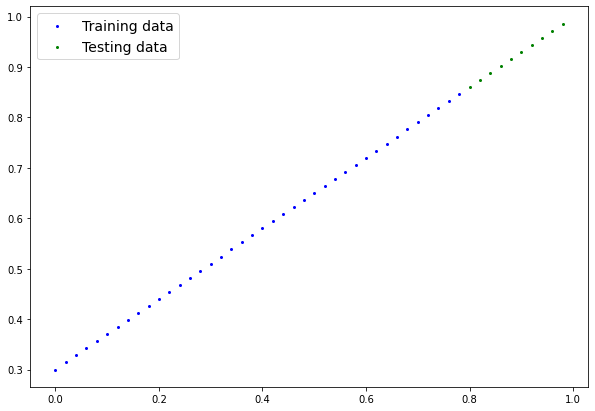

In [43]:
plot_predictions()

In [44]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-1.3473],
        [-1.3461],
        [-1.3449],
        [-1.3438],
        [-1.3426],
        [-1.3414],
        [-1.3402],
        [-1.3391],
        [-1.3379],
        [-1.3367]])

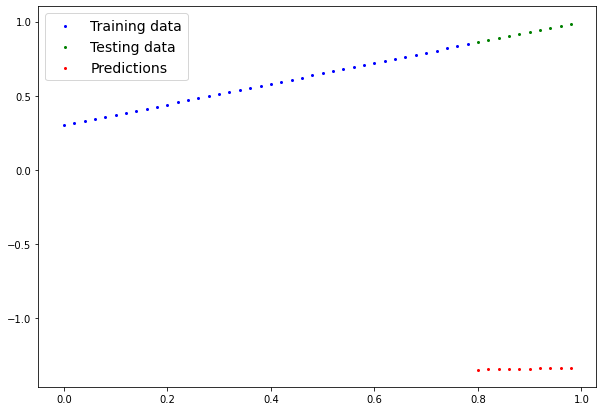

In [45]:

plot_predictions(predictions = y_preds)

In [77]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001 )


In [80]:
epochs =100

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.7005])), ('bias', tensor([0.2991]))])


In [87]:
model_0.eval()
with torch.inference_mode():
  test_preds = model_0(X_test)

test_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9155],
        [0.9296],
        [0.9436],
        [0.9576],
        [0.9716],
        [0.9856]])

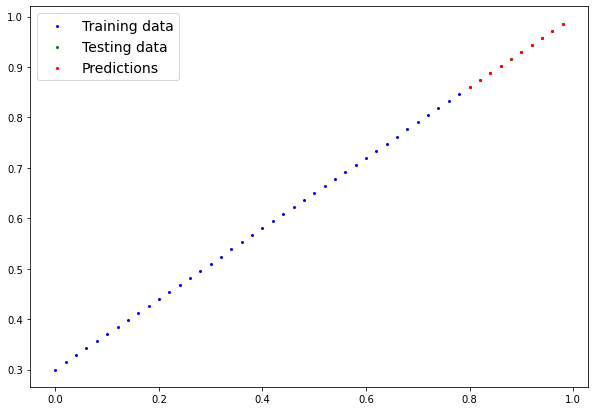

In [88]:
plot_predictions(predictions = test_preds)


In [90]:
test_loss = loss_fn(test_preds, y_test)
test_loss

tensor(0.0004)